In [1]:
import pandas as pd
import numpy as np
import kagglehub
import os

In [2]:
# Read the data excel sheet
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name = 1)
df.to_csv('Bank_Personal_Loan_Modelling.csv',index = None, header = True)
print(df)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0            

In [3]:
# Read the Description Excel Sheet
df1 = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name = 'Description')
df1

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,Data Description:,NaN
5,NaN,NaN,NaN
6,NaN,ID,Customer ID
7,NaN,Age,Customer's age in completed years
8,NaN,Experience,#years of professional experience
9,NaN,Income,Annual income of the customer ($000)


In [4]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
df.shape

(5000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
# ID is actually act as an identifier and lacks valuable insformation. So we remove this feature:
df.drop('ID', axis=1, inplace=True) 

In [10]:
df.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Data set basic Information:

In this dataset there are 5000 different customers.

We have 13 independet variables and 1 dependent Personal Loan

We have 6 numeric variables : ID, Age, Experience, Income, CC_Avg, Mortgage

We have 3 categorical variables: Family,Education, ZIP code (since it is unique for every town)

We have 5 boolean Personal Loan, Securities Account, CD Account, Online, CreditCard

There are no missing values or duplicated values.

# Step 1: Univariate Analysis

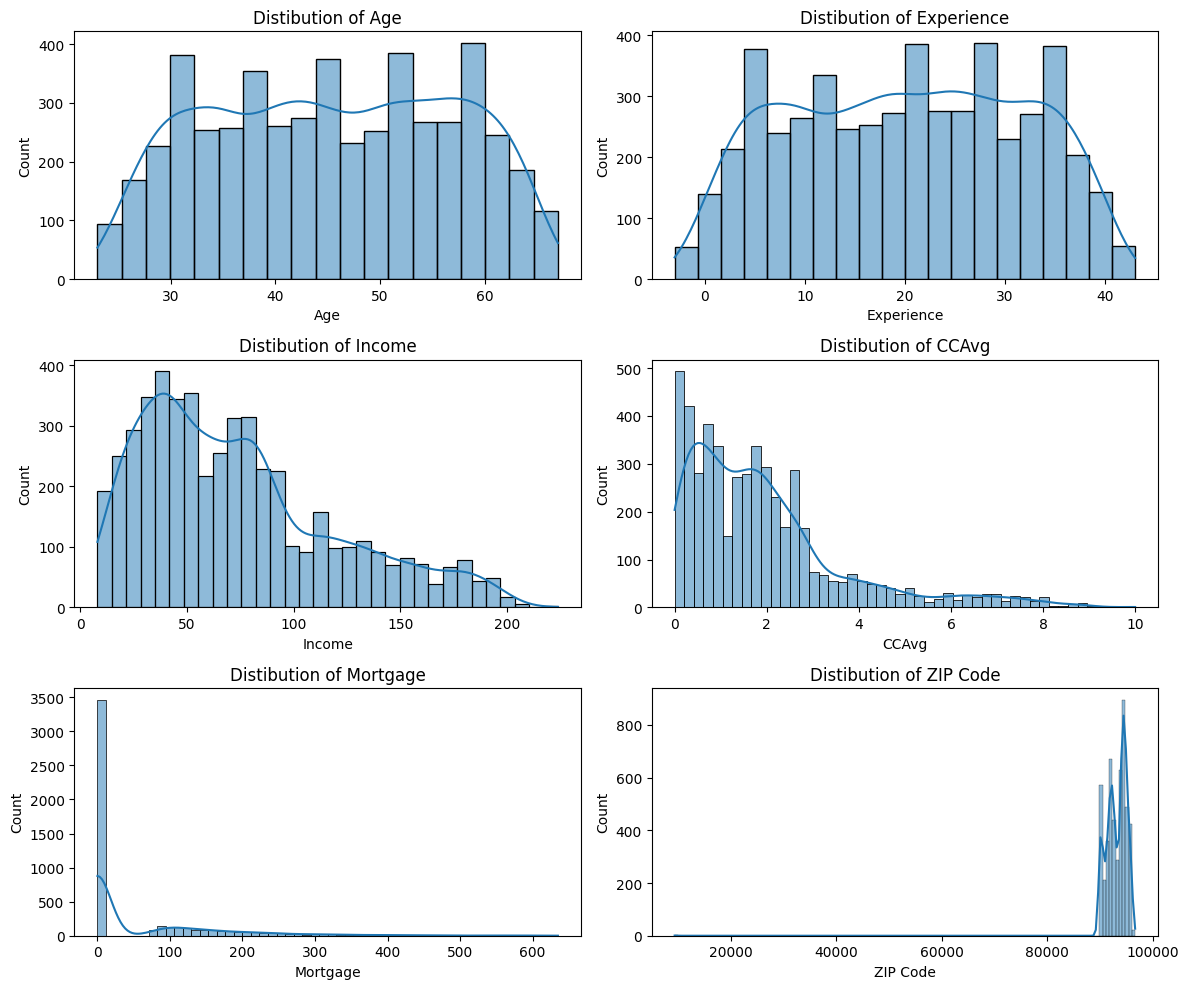

In [11]:
# Plot continues data
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(12, 10))  #figures fig are the entire canvas. Ax are a single plot
axes = axes.flatten()  # axes is numpy array

for i,x in enumerate(["Age", "Experience", "Income", "CCAvg", "Mortgage","ZIP Code"]):
    sns.histplot(df,x = x ,kde = True,ax = axes[i])
    axes[i].set_title(f'Distibution of {x}')
    
plt.tight_layout()
plt.show()

# Experience

In [12]:
# In Experience catgory there are some negative values
df_filtered = df[df['Experience']<0]
df_filtered.count()

Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

In [13]:
#Since there are only 52 null values out of 5000. 
# We assume that here values are incorrectly 
# recorder as negative so we will replace then with their absolute value 
df['Experience'] = df['Experience'].apply(abs)

# Zip Code

     Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
384   51          25      21      9307       4    0.6          3         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  
384              0                   0           0       1           1  


Text(9307.0, 1, 'Min value')

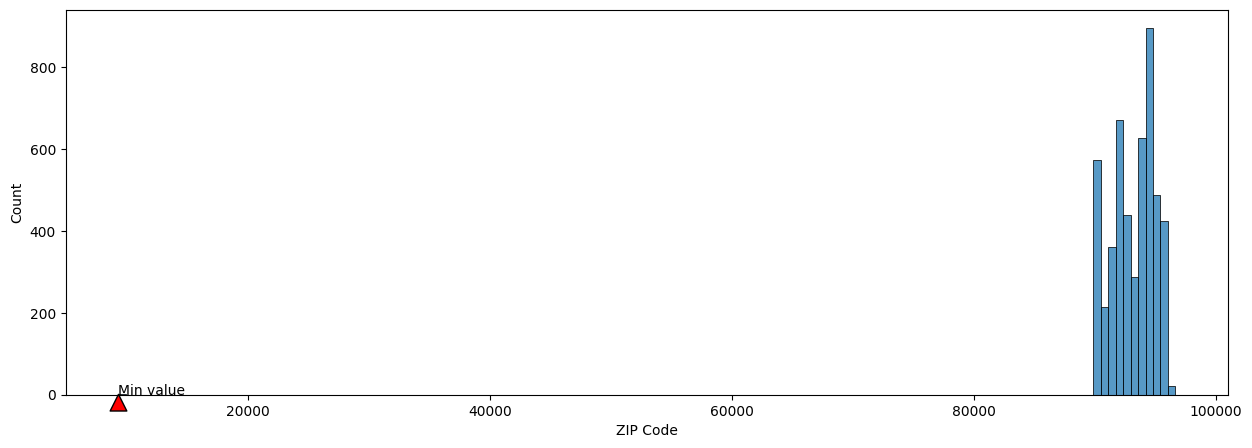

In [14]:
# Zip code under 80000
print(df[df["ZIP Code"]<80000])

#ZIP Code feature has a minimum value that is much smaller than the average value
df["ZIP Code"].describe()
color = 'red'
#Let 's see a further visualization
plt.figure(figsize = (15,5))
sns.histplot(data = df,x = df["ZIP Code"])
plt.annotate('Min value' ,xy =(9307.000000,1),
             xycoords='data',
            arrowprops=dict(facecolor='red', shrink=0.01))


In [15]:
#Since there is only one Zip Code on this min value we drop this whole line
df.drop(df[df["ZIP Code"] < 80000].index,inplace = True)

#Rescale the index because now there is one row lesser
df.reset_index(drop = True, inplace= True)

# Mortgage

Mortgage is positive skewed. That 's meaning that most data points are clustered in the left with a few high- value outliers on the right

<Figure size 1000x700 with 0 Axes>

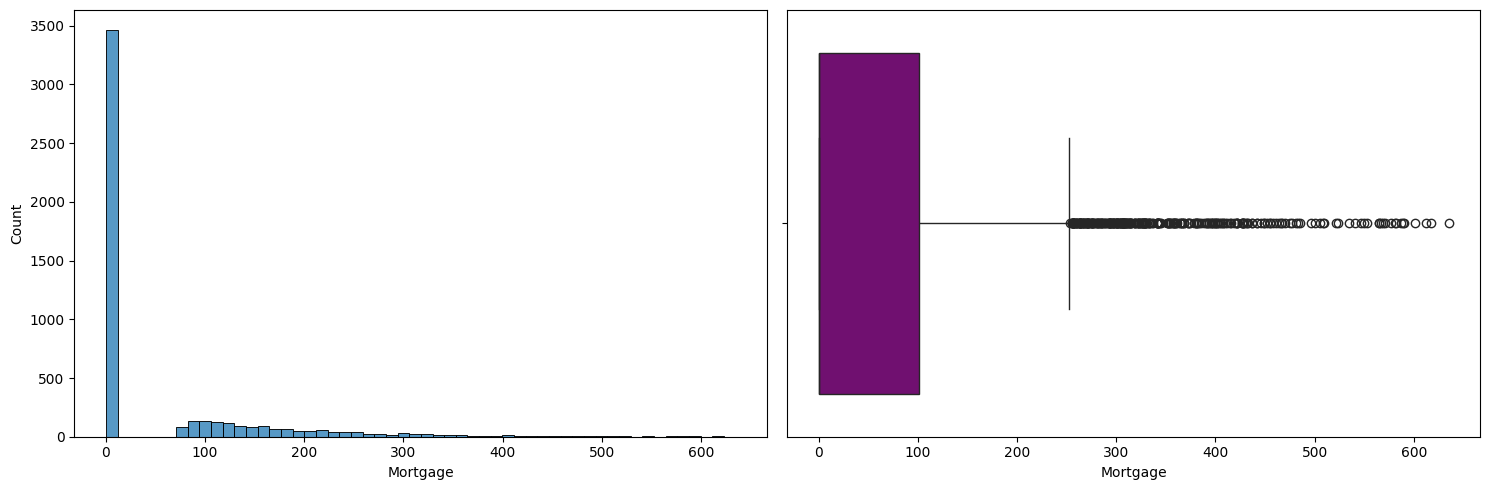

In [16]:
# Mortgage further analysis
fig = plt.figure(figsize =(10, 7))
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.histplot(x= 'Mortgage', data = df, ax = ax[0])
sns.boxplot(x='Mortgage', data = df,color='purple',ax = ax[1])
plt.tight_layout()
plt.show()

In [17]:
# Identify mortgage outliers
Q1 = np.percentile(df['Mortgage'], 25, method='midpoint')
Q3 = np.percentile(df['Mortgage'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

# we have only upper outliers so 
upper = Q3+1.5*IQR
upper_array = df['Mortgage'] >= upper
print("Upper Bound:", upper)
print(upper_array.sum())

# there are only 291 outliers. So we will drop there records
df = df.drop(df[upper_array].index)


101.0
Upper Bound: 252.5
291


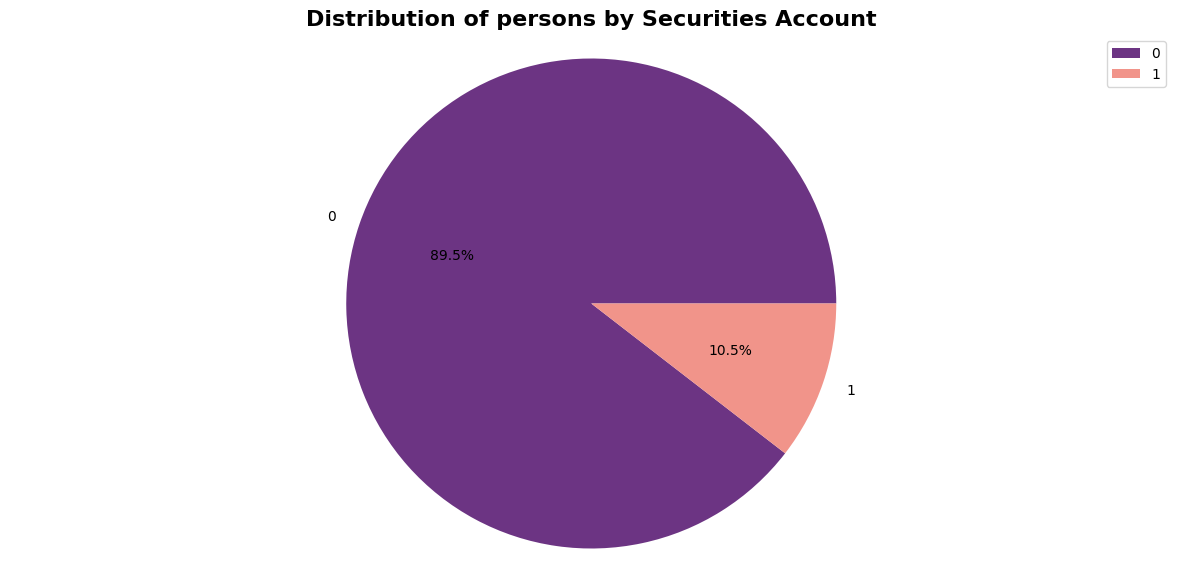

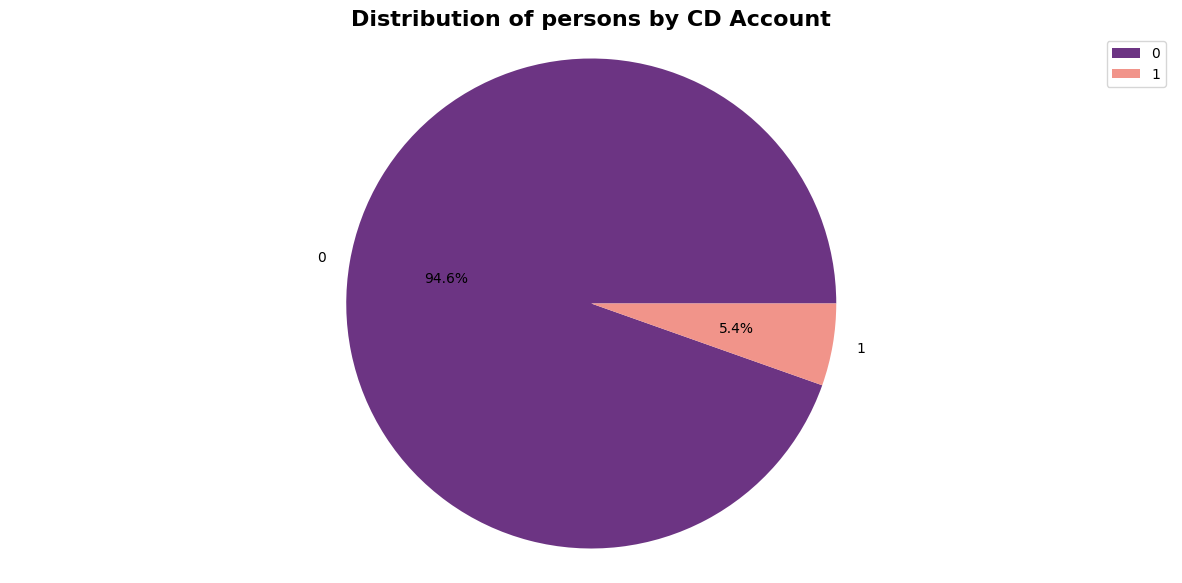

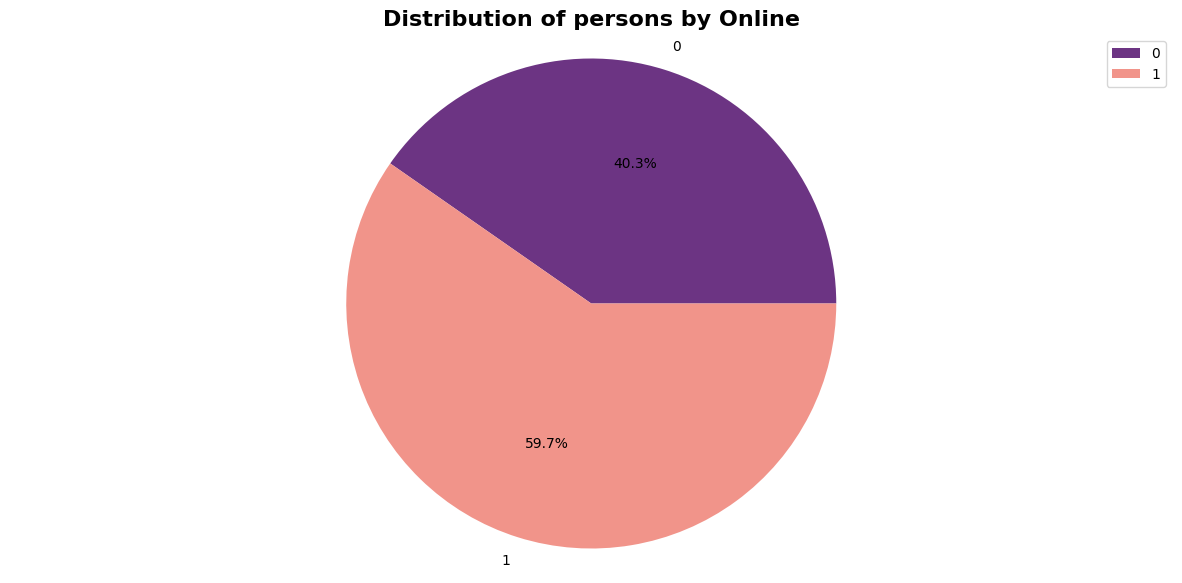

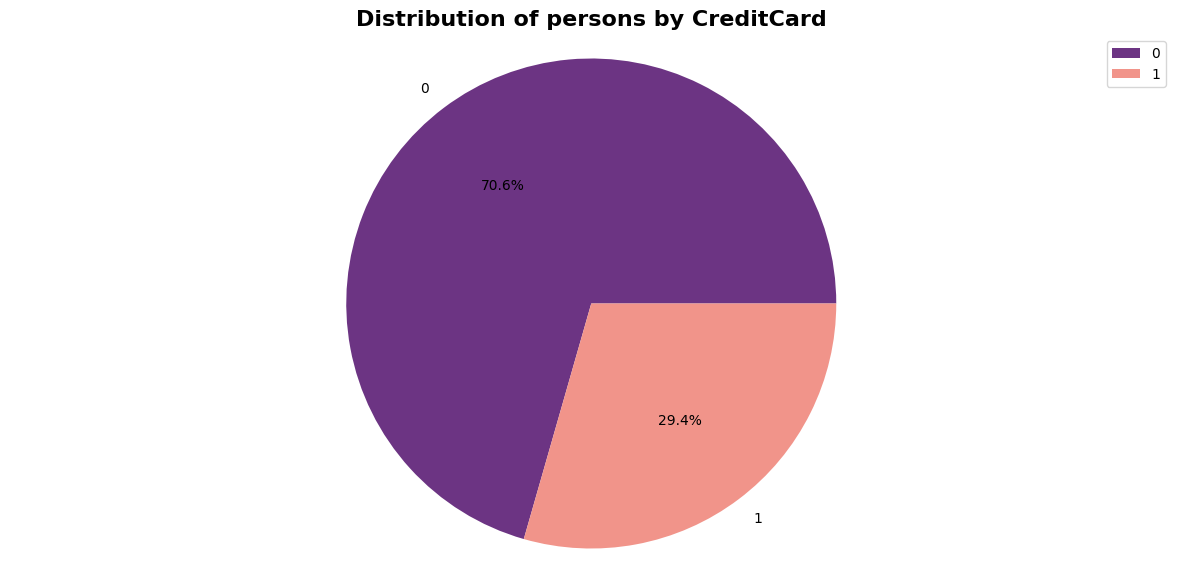

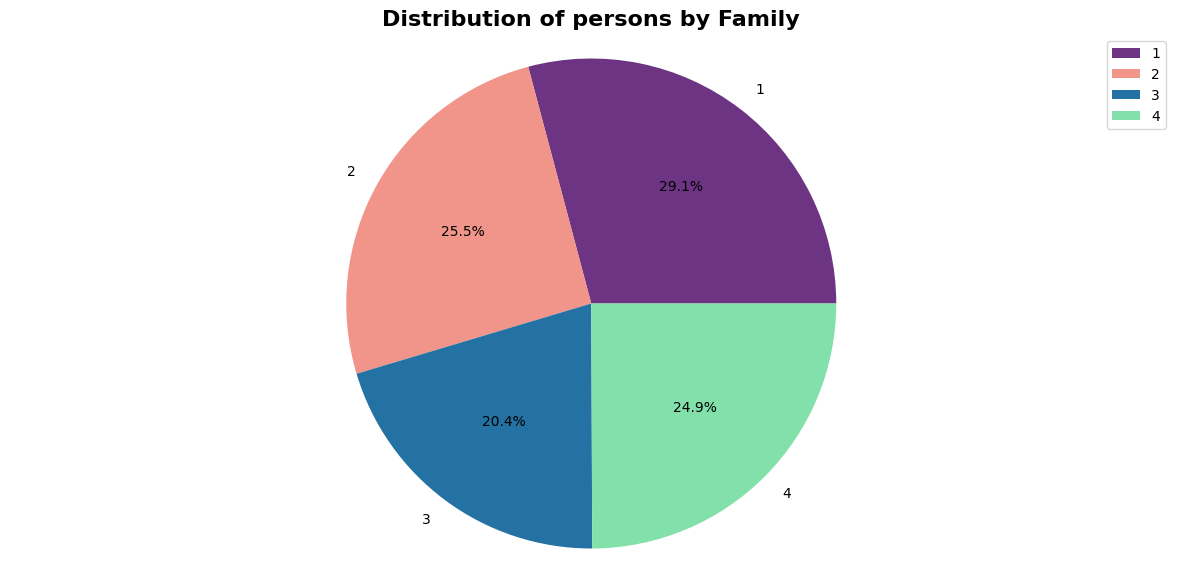

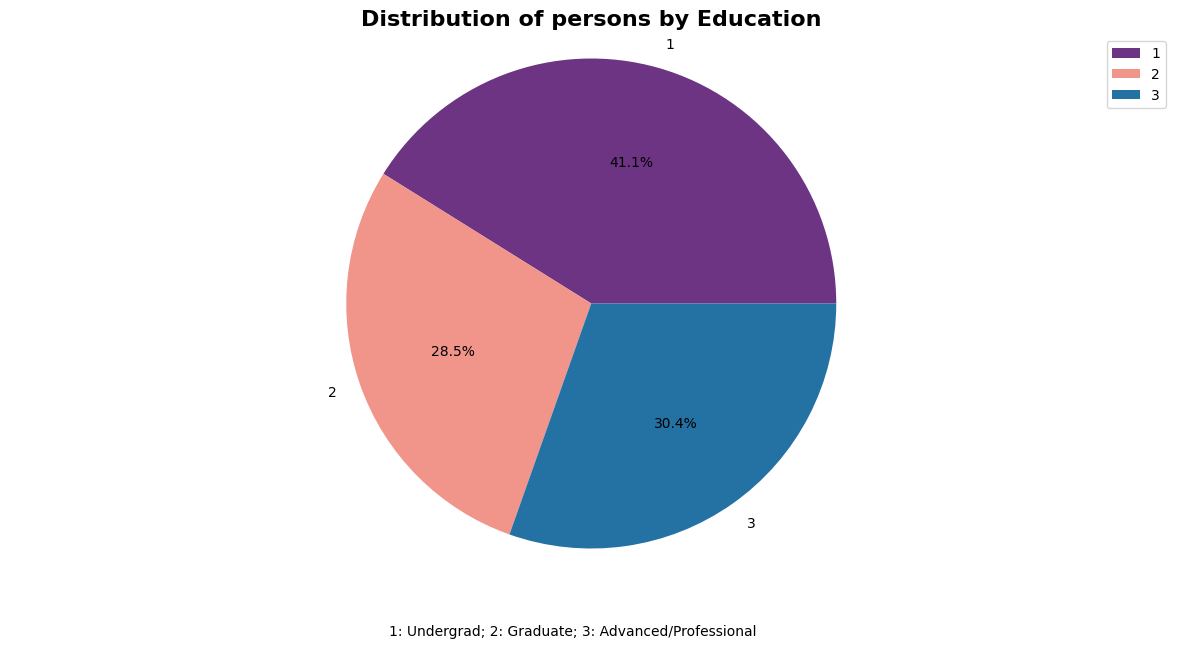

In [18]:
# Let s plot categorical columns
def plot_categ_(df: pd.DataFrame, col: str):
    df4 = df.groupby(col).size()
    df4.plot.pie(autopct ='%1.1f%%',figsize=(15,7),colors = ['#6C3483', '#F1948A', '#2471A3', '#82E0AA', '#A569BD', '#F7DC6F'])
    plt.title(f'Distribution of persons by {col}', fontsize=16, fontweight='bold')
    plt.axis('equal')
    plt.legend()
    
    if col == "Education":
        plt.figtext(0.5, 0.02,"1: Undergrad; 2: Graduate; 3: Advanced/Professional", ha='center', fontsize=10)
    plt.show()
    
for col in [ "Securities Account", "CD Account", "Online", "CreditCard", "Family","Education"]:
    plot_categ_(df,col)

# Pearson 's Correlation Analysis

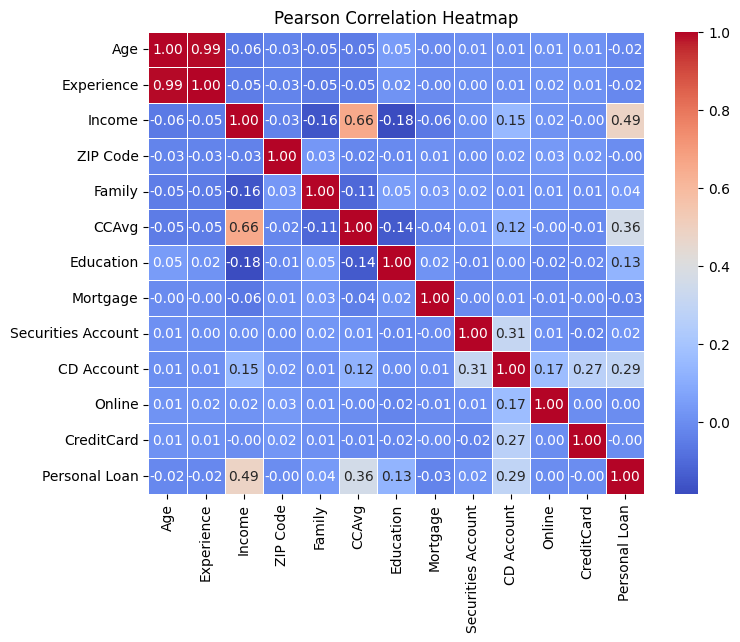

In [19]:
# Exclude the target variable
target = 'Personal Loan'

# Concatenate the whole dataset with target (to keep the target on last column)
df_n = pd.concat([df.drop(target,axis =1), df[target]], axis =1 ) # place the target in the end
matrix = df_n.corr()
plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

#### Pearson 's correlation outcome.

- Age & Experience are ***highly (positive) correlated (correlation = + 0.99)***. Maybe there is a problem of multicollinearity.

- Income and Average spending on credit cards (CCAvg) are ***positive correlated (correlation = + 0.66)*** . 

- Income and Personal Loan are ***positive correlated (correlation = + 0.49)***. 

# Bivariate Analysis

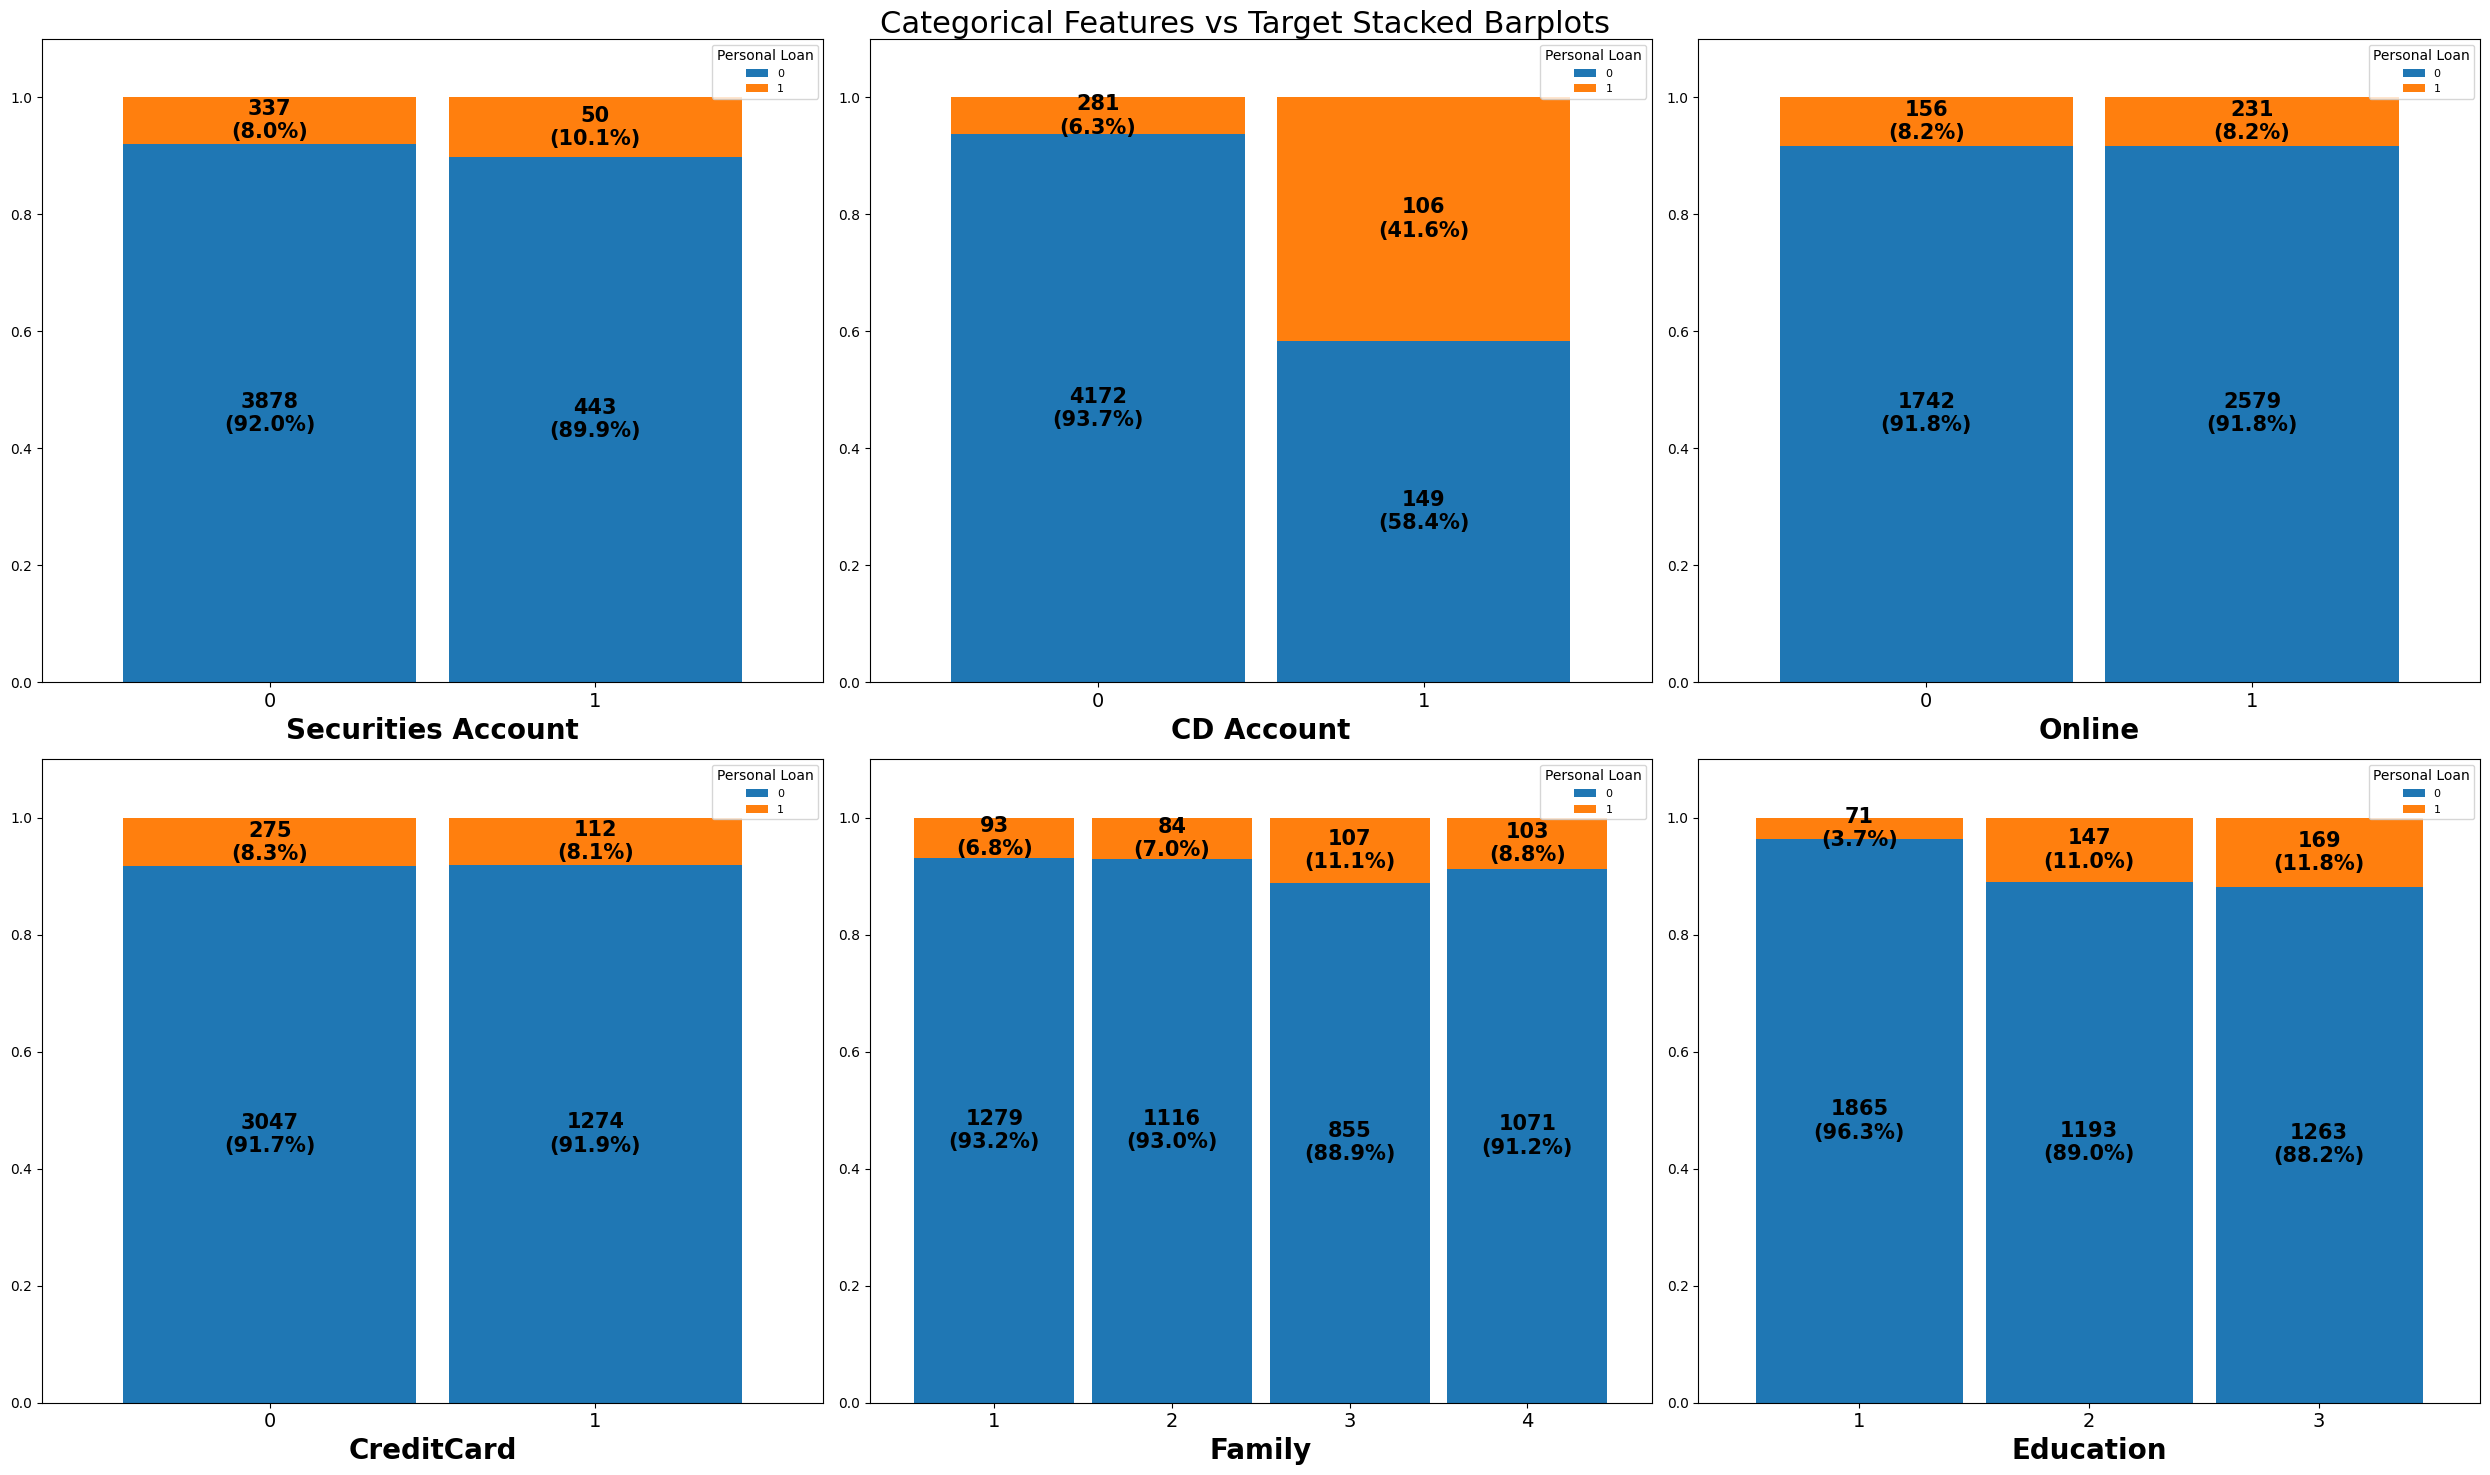

In [20]:
import matplotlib.gridspec as gridspec
# First we will examine the relation between categorical feature and target (Personal Loan)
Cat_features = [ "Securities Account", "CD Account", "Online", "CreditCard", "Family","Education"]

target = 'Personal Loan'

# Plot the categorical with target variable
fig, axes = plt.subplots(2,3, figsize=(25,15))

for i,x in enumerate(Cat_features):
    row, col = divmod(i, 3)
    
    # Create a table for every categorical feature with target feature
    crosstb = pd.crosstab(df[x], df[target])
    
    # Create a proportional crosstab table
    crosstb_prop = pd.crosstab(df[x], df[target], normalize='index')
    
    ax = axes[row, col]
    crosstb_prop.plot(kind='bar', ax=ax, stacked=True, width=0.9, legend=False)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, cat in enumerate(crosstb.index):  # e.g Family this loop runs family = 1,2,3,4
        cumulative = 0
        for target_val in crosstb.columns:  # This loop run 0 (for not taking Personal Loan) and 1 (take loan)
            prop = crosstb_prop.loc[cat, target_val] # calculates the proportion of each bar
            count = crosstb.loc[cat, target_val] # calculates the actual predictions
            ax.text(idx, cumulative + prop / 2, f'{count}\n({prop*100:.1f}%)', # prop*100 make the proportion in hundred %
                    ha='center', va='center', fontsize=15, color='black', fontweight='bold') # fontsize is about text
            cumulative += prop # keeps track of how tall the stacked bar has grown so far.
    

    # Add the proportions and counts of the iindividual bars to plot
    ax.set_ylim([0,1.1])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0,fontsize=14) # controls where the x values for x label should be
    ax.set_xlabel(x, fontsize=20, fontweight='bold') # This makes the category under each ax bold and bigger
    ax.legend(title='Personal Loan', loc='upper right',fontsize=8)
    
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)    
plt.tight_layout()
plt.show()

C:\Users\Xaris\AppData\Local\Temp\ipykernel_25360\2020711961.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data = df[df[target] ==0], x = x,  fill=True, common_norm=False, palette="crest",
C:\Users\Xaris\AppData\Local\Temp\ipykernel_25360\2020711961.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data = df[df[target] ==1], x = x,  fill=True, common_norm=False, palette="crest",
C:\Users\Xaris\AppData\Local\Temp\ipykernel_25360\2020711961.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data = df[df[target] ==0], x = x,  fill=True, common_norm=False, palette="crest",
C:\Users\Xaris\AppData\Local\Temp\ipykernel_25360\2020711961.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data = df[df[target] ==1], x = x,  fill=True, common_norm=False, palette="crest",
C:\Users\Xaris\AppData\Local\Temp\ip

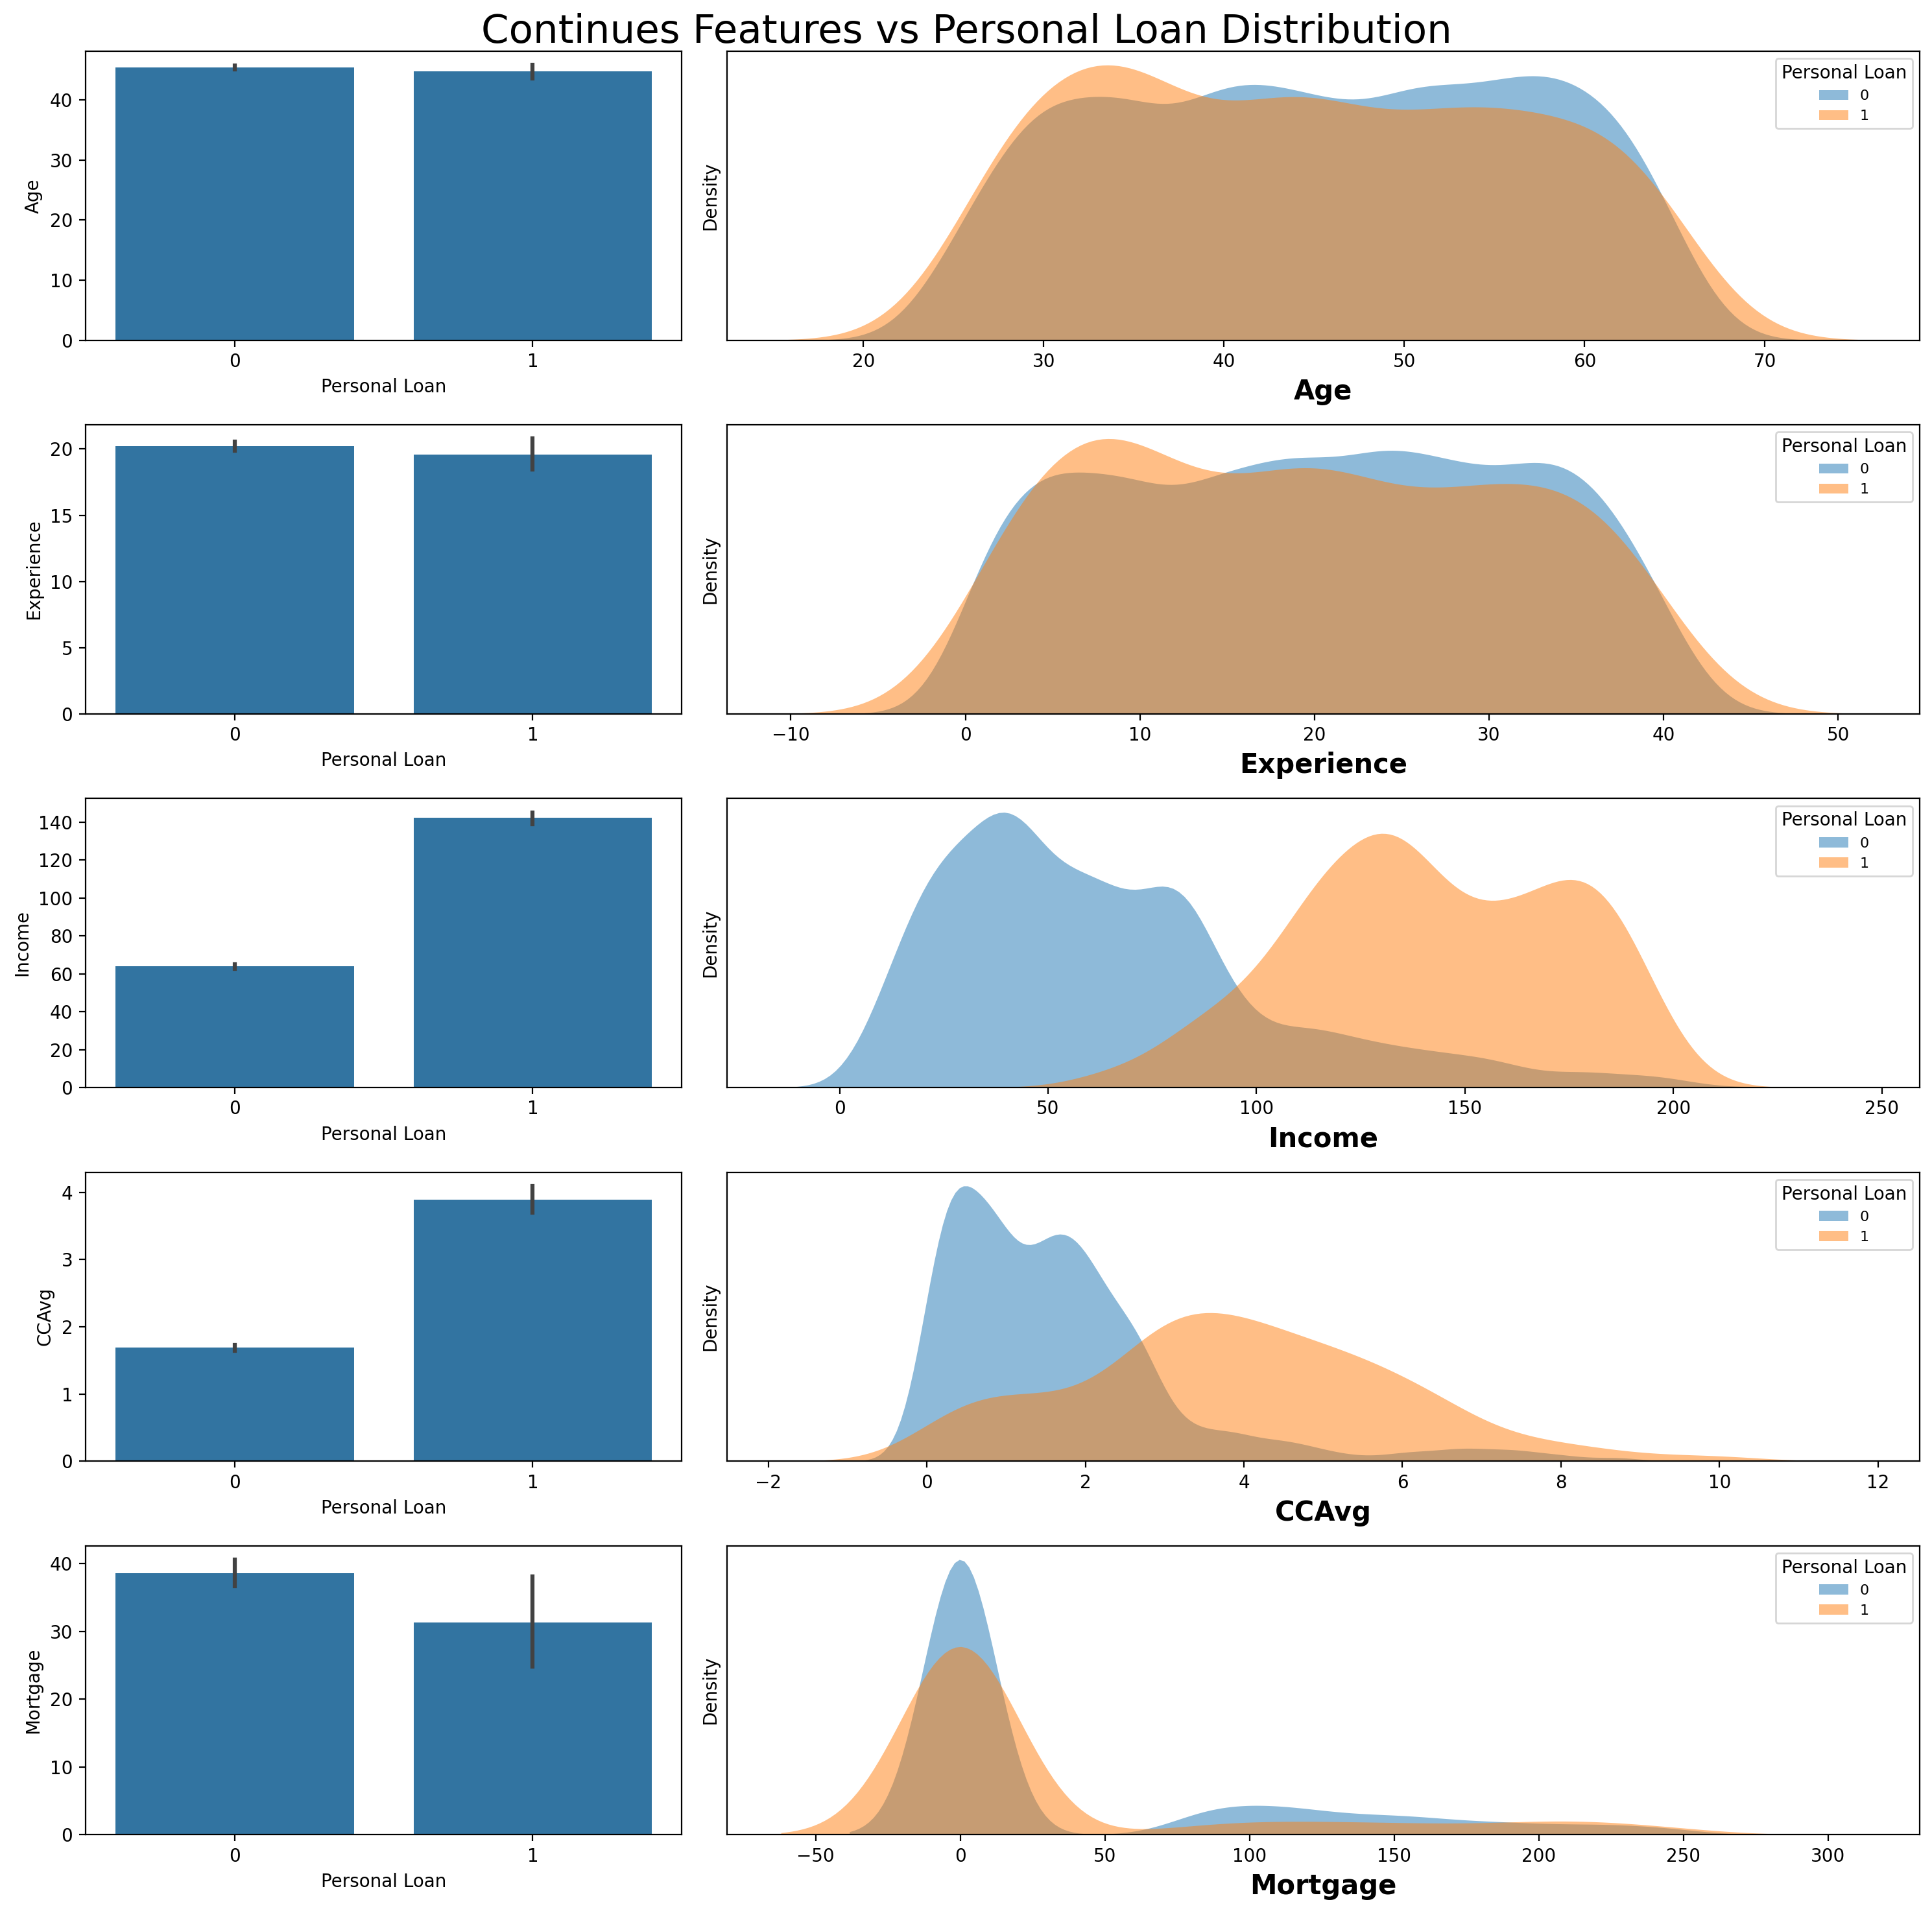

In [21]:
# Examine numerical features
continues_var = ["Age", "Experience", "Income", "CCAvg", "Mortgage"]

# target remain the same as before
fig, ax = plt.subplots(5, 2, figsize=(15,15), dpi=200, gridspec_kw={'width_ratios': [1, 2]}) 
# gridspec_kw is used to create different size for each subplot 

for i,x in enumerate(continues_var):
    graph = sns.barplot(df, x = target ,y= x, ax = ax[i,0]) # ax[i,0] in order to plot the barplots in left
    
    sns.kdeplot(data = df[df[target] ==0], x = x,  fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0, ax = ax[i,1], label = '0') # ax[i,1] in order to plot the barplots in right
    
    sns.kdeplot(data = df[df[target] ==1], x = x,  fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0, ax = ax[i,1], label = '1') # if we dont add label = '0' we will not have it kde legend
    
    ax[i,1].set_yticks([]) # We use it in order to get density on y column
    ax[i,1].set_xlabel(x, fontsize=15, fontweight='bold') # This makes the category under each ax bold and bigger
    
    ax[i,1].legend(title='Personal Loan', loc='upper right',fontsize=8)
    
plt.suptitle('Continues Features vs Personal Loan Distribution', fontsize=22)       
plt.tight_layout()                     

plt.show()    

# Feature Transformation

CC Avg is measured on month base. Income is measured in yearly base. 
So in order to keep same base i 'll convert CC Avg to month base.

In [22]:
# Transform CCAvg
df['CCAvg'] = df['CCAvg']*12


In [23]:
df['CCAvg']

0       19.2
1       18.0
2       12.0
3       32.4
4       12.0
        ... 
4994    22.8
4995     4.8
4996     3.6
4997     6.0
4998     9.6
Name: CCAvg, Length: 4708, dtype: float64

# Imbalanced Personal Loan Distribution

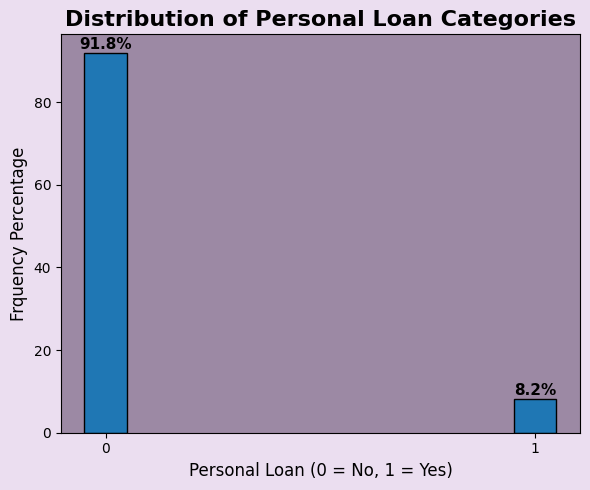

In [24]:
# Plot the Independent variable Personal Loan
plt.figure(figsize=(6, 5))

counts = df['Personal Loan'].value_counts(normalize=True) * 100
categories = counts.index
values = counts.values

# Add frequency percentages to the plot
for i, v in enumerate(values):
    plt.text(categories[i], v + 1, f'{v:.1f}%', 
             ha='center', fontsize=11, fontweight='bold')
    
bars = plt.bar(categories, values, edgecolor='black', width = 0.1)
plt.title(f'Distribution of Personal Loan Categories', fontsize=16, fontweight='bold')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Frquency Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.xticks(np.arange(0, 1.1, step=1))
plt.gca().set_facecolor("#9C89A4")        # plot background
plt.gcf().set_facecolor('#EBDEF0')        # figure background
plt.grid(False)                           # remove grid
plt.tight_layout()
plt.show()

As we can see from the above distribution of Personal Loan Frequency Percentage the dataset is imbalanced.  

In order to fix this imbalance problem we will use ***stratify*** in train_test_split and this technique ensures that the training and testing sets have the same proportion of classes.

In [25]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Continuous Features - Age, Income, CCAvg, Mortgage <br>
Binary Features - Securities Account, CD Account, Online, CreditCard <br>
Categorical Data - Education, ZIP Code <br>
Multinomial Features - Family

### How to handle these different types of data ? <br>
Implement Gaussian NB to continues data.<br>
Implement Bernoully NB to binary classified data.<br>
Implement Categorical NB to categorical data.<br>
Implement Complement NB to Multinomial Features.

Best Parameters: {'preprocessor__discretizer__n_bins': np.int64(10), 'preprocessor__discretizer__strategy': 'kmeans'}
Best CV Accuracy: 0.8645830471218574

Classification Report for :ComplementNB()
              precision    recall  f1-score   support

           0       0.99      0.85      0.91       865
           1       0.34      0.90      0.49        77

    accuracy                           0.85       942
   macro avg       0.67      0.87      0.70       942
weighted avg       0.94      0.85      0.88       942



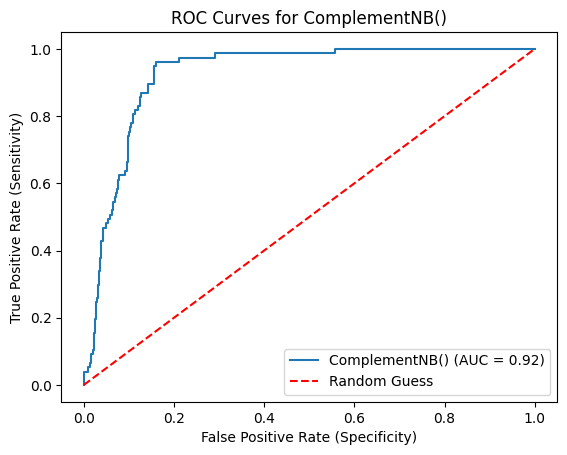

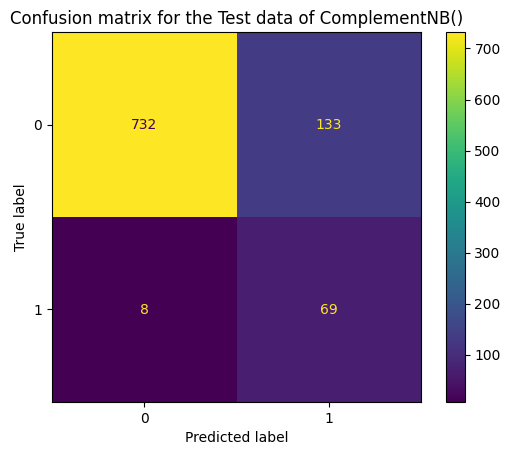

c:\Users\Xaris\Desktop\Project\Bank-Loan-Classification\myenv\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
c:\Users\Xaris\Desktop\Project\Bank-Loan-Classification\myenv\Lib\site-packages\sklearn\preprocessing\_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(


Best Parameters: {'preprocessor__discretizer__n_bins': np.int64(6), 'preprocessor__discretizer__strategy': 'quantile'}
Best CV Accuracy: 0.9500822527749303

Classification Report for :GaussianNB()
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       865
           1       0.71      0.66      0.68        77

    accuracy                           0.95       942
   macro avg       0.84      0.82      0.83       942
weighted avg       0.95      0.95      0.95       942



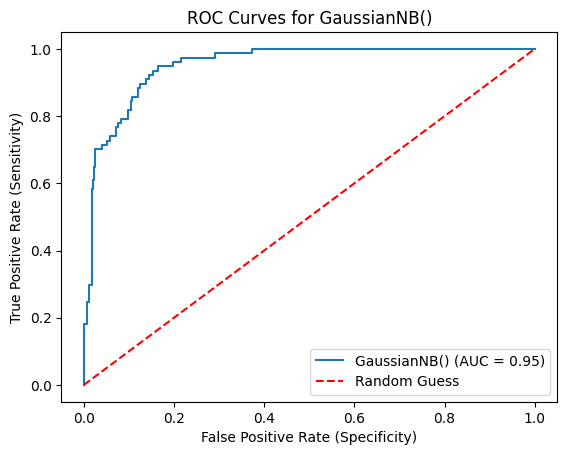

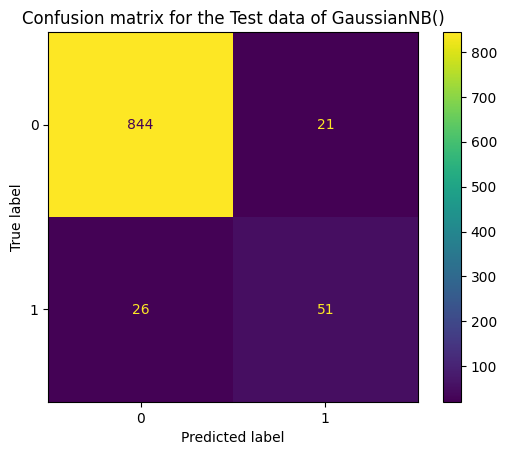

Best Parameters: {'preprocessor__discretizer__n_bins': np.int64(4), 'preprocessor__discretizer__strategy': 'uniform'}
Best CV Accuracy: 0.9283058746446574

Classification Report for :BernoulliNB()
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       865
           1       0.65      0.19      0.30        77

    accuracy                           0.93       942
   macro avg       0.79      0.59      0.63       942
weighted avg       0.91      0.93      0.91       942



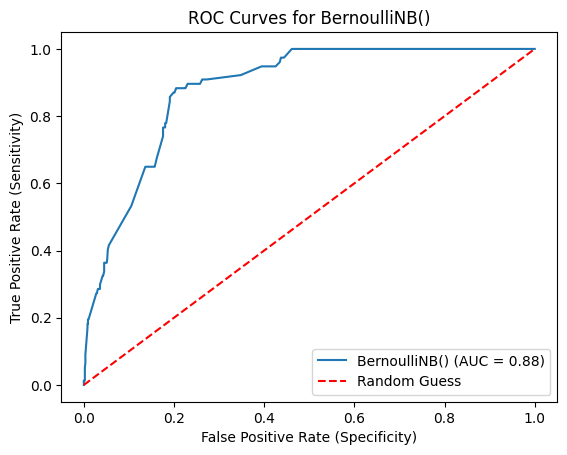

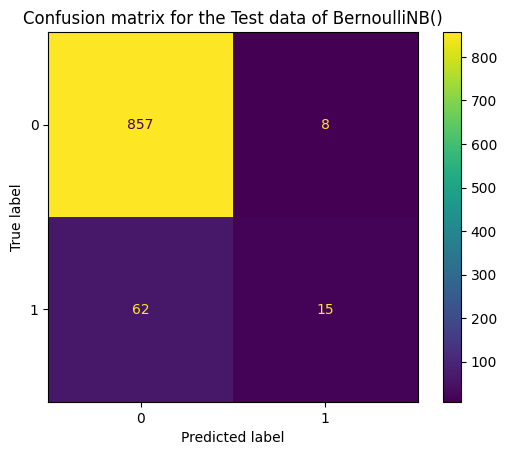

Best Parameters: {'preprocessor__discretizer__n_bins': np.int64(10), 'preprocessor__discretizer__strategy': 'kmeans'}
Best CV Accuracy: 0.9383967225703728

Classification Report for :CategoricalNB()
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       865
           1       0.90      0.36      0.52        77

    accuracy                           0.94       942
   macro avg       0.92      0.68      0.74       942
weighted avg       0.94      0.94      0.93       942



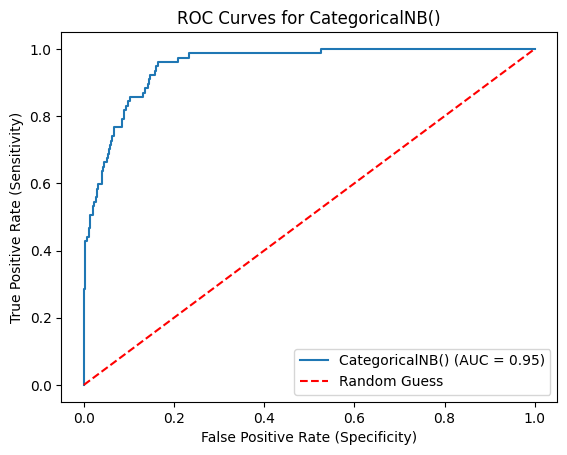

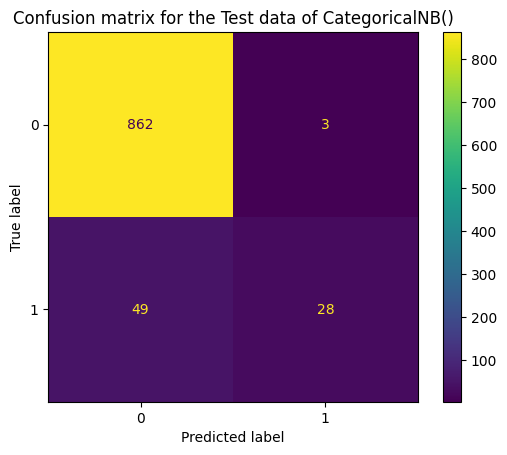

In [26]:
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Function to compute all of the diff kinds of naive bayes
def predictions(df, naive_tech):
        con_dt = ['Age', 'Income', 'CCAvg', 'Mortgage', 'Experience']
        X = df.drop('Personal Loan', axis=1)
        y = df['Personal Loan']

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        for key,model in naive_tech.items(): 
            # Aplly discretizer only in continuous data
            preprocessor = ColumnTransformer(
                transformers=[
                    ('discretizer', KBinsDiscretizer(encode='ordinal'), con_dt)
                ],
                remainder='passthrough'  # leave other columns as they are
            )

            # Create pipeline
            pipe1 = Pipeline([
                ('preprocessor', preprocessor),
                ('model', model)
            ])

            # Parameter grid for GridSearchCV
            params = {
                'preprocessor__discretizer__strategy': ['uniform', 'quantile', 'kmeans'],
                'preprocessor__discretizer__n_bins': np.arange(2, 11)
            }

            # Stratified K-Fold cross-validation
            cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

            # GridSearch to find best discretization settings
            gsc = GridSearchCV(pipe1, params, cv=cv, scoring='accuracy', n_jobs=-1) # n_jobs = -1 in order get only the results
            gsc.fit(X_train, y_train)

            # Best hyperparameters
            print("Best Parameters:", gsc.best_params_)
            print("Best CV Accuracy:", gsc.best_score_)

            # Predict on test set using best model
            best_model = gsc.best_estimator_
            y_pred = best_model.predict(X_test)
            y_pred_prob = best_model.predict_proba(X_test)[:, 1]

            # Evaluate performance
            acc_score = accuracy_score(y_test, y_pred)
            auc_score = roc_auc_score(y_test, y_pred_prob)

            print("="*20)
            print(f"\nClassification Report for :{model}")
            print(classification_report(y_test, y_pred))
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')
            # Plot the red line
            plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

            plt.xlabel('False Positive Rate (Specificity)')
            plt.ylabel('True Positive Rate (Sensitivity)')
            plt.title(f'ROC Curves for {model}')
            plt.legend()
            plt.tight_layout
            plt.show()

            # Plot Confusion matrix on ax[1]
            cm = confusion_matrix(y_test, y_pred)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            disp.plot()
            plt.title(f'Confusion matrix for the Test data of {model}')
            plt.tight_layout
            plt.show()
            
from sklearn.naive_bayes import GaussianNB, ComplementNB, BernoulliNB, CategoricalNB
naive_tech = {'cnb': ComplementNB(),
              'GaussianNB':GaussianNB(),
              'BernoulliNB': BernoulliNB(),
              'CategoricalNB': CategoricalNB()}

predictions(df,naive_tech)

The F1 Score is the harmonic mean of precision and recall. It is useful when we need a balance between precision and recall as it combines both into a single number. A high F1 score means the model performs well on both metrics (0 and 1). 

# SVM (Support Vector Machine)

SVM works by finding the best boundary that separates the data into two predicted classes (Personal loan:0 ,1) by maximizing the distance between the boundary and the closest data points. This means that SVM is based on the concept of distance and seeks to find the optimal boundary that maximizes the distance between the classes. Steps before implement SVM:
- Standard Scaling the features to have a mean of zero and a standard deviation of one 
- Handle imbalanced target variable (Smote)
- Applying LDA
- Implement svm on the new transformed dimension data

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import svm
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()

# create instance for SVM
clf = svm.SVC(probability=True)

# SMOTE instance
sm = SMOTE(random_state=42)

model = Pipeline([
    ('smote',sm),
    ('scaler',scaler),
    ('lda', LDA(n_components=1)),  # dimensionality reduction to 1 since we ve got binary classification
    ('clf', clf)
])

params = {'clf__kernel': ['linear', 'rbf', 'poly','sigmoid']}

# Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch to find best svm kernel
gsc = GridSearchCV(model, params, cv=cv, scoring='accuracy', n_jobs=-1)

gsc.fit(X_train, y_train)

,estimator,Pipeline(step...ility=True))])
,param_grid,"{'clf__kernel': ['linear', 'rbf', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,sampling_strategy,'auto'


In [28]:
# Results
print("Best Parameters:", gsc.best_params_)
print("Best CV Accuracy:", gsc.best_score_)
print('Best estimators: ',gsc.best_estimator_)

Best Parameters: {'clf__kernel': 'linear'}
Best CV Accuracy: 0.8815753784156037
Best estimators:  Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis(n_components=1)),
                ('clf', SVC(kernel='linear', probability=True))])


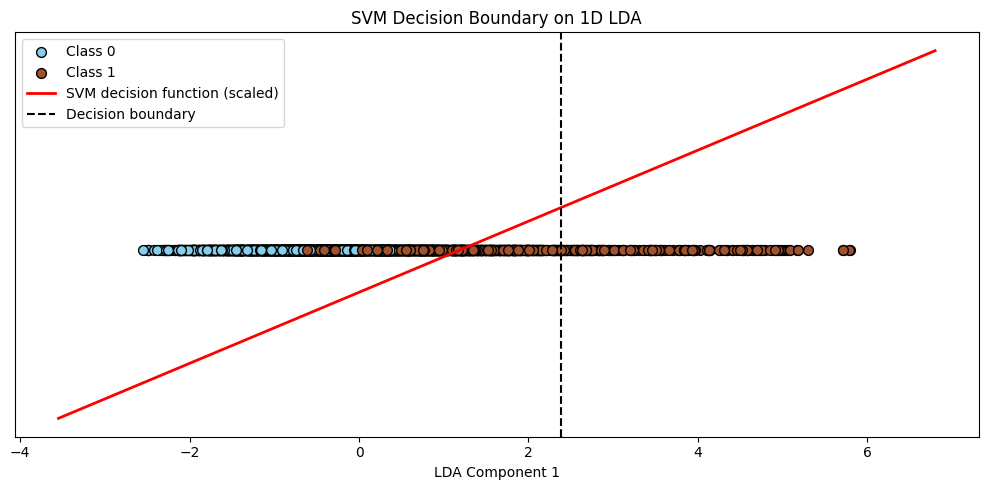

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Extract best estimator
best_model = gsc.best_estimator_

# Transform training data through scaler + LDA
X_train_scaled = best_model.named_steps['scaler'].fit_transform(X_train)
X_train_lda = best_model.named_steps['lda'].fit_transform(X_train_scaled, y_train)

# Fit classifier on LDA-transformed data
clf_1d = best_model.named_steps['clf']
clf_1d.fit(X_train_lda, y_train)

# Create points along the LDA axis
x_vals = np.linspace(X_train_lda.min()-1, X_train_lda.max()+1, 500).reshape(-1, 1)
y_decision = clf_1d.decision_function(x_vals)

# Find decision boundary (where decision_function = 0)
boundary_x = x_vals[np.argmin(np.abs(y_decision))][0]

# Plot
plt.figure(figsize=(10, 5))

# Plot 1D scatter of classes along LDA axis
plt.scatter(X_train_lda[y_train == 0], np.zeros_like(X_train_lda[y_train == 0]), 
            color='skyblue', edgecolors='k', label='Class 0', s=50)
plt.scatter(X_train_lda[y_train == 1], np.zeros_like(X_train_lda[y_train == 1]), 
            color='sienna', edgecolors='k', label='Class 1', s=50)

# Plot decision function (optional, slightly shifted up for visibility)
plt.plot(x_vals, y_decision / np.max(np.abs(y_decision)) * 0.5 + 0.1, 
         color='red', linewidth=2, label='SVM decision function (scaled)')

# Plot decision boundary
plt.axvline(x=boundary_x, color='black', linestyle='--', label='Decision boundary')

plt.xlabel("LDA Component 1")
plt.yticks([])
plt.title("SVM Decision Boundary on 1D LDA")
plt.legend()
plt.tight_layout()
plt.show()



Classification Report for :SVM
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       865
           1       0.77      0.60      0.67        77

    accuracy                           0.95       942
   macro avg       0.87      0.79      0.82       942
weighted avg       0.95      0.95      0.95       942



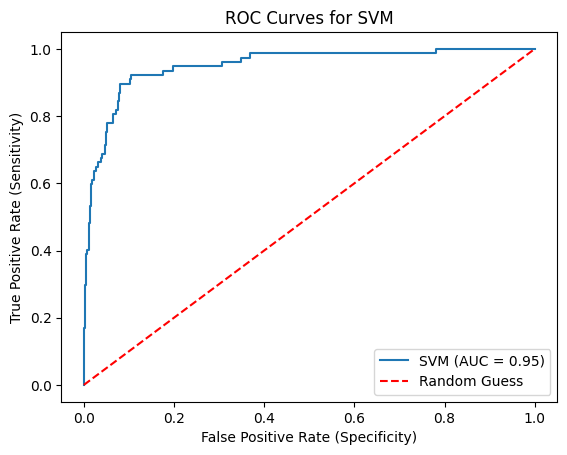

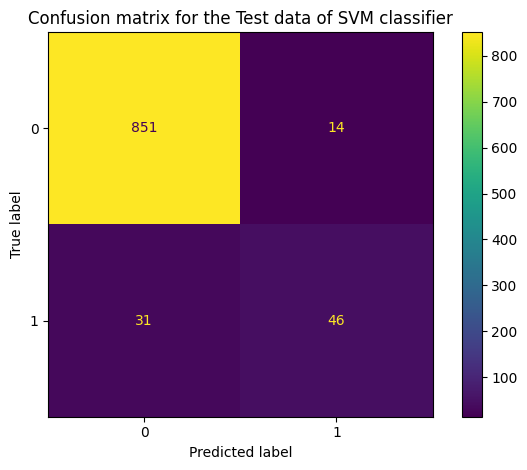

In [30]:
# Predict on test set using best model
best_model = gsc.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluate performance
acc_score = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)

print("="*20)
print(f"\nClassification Report for :SVM")
print(classification_report(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')
# Plot the red line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title(f'ROC Curves for SVM')
plt.legend()
plt.tight_layout
plt.show()

# Plot Confusion matrix on ax[1]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion matrix for the Test data of SVM classifier')
plt.tight_layout()
plt.show()

# Let s just use LDA only.
The fact that the dataset is so imbalanced is an issue for further analysis. Therefore, we select all zeros (Personal Loan equals zero) parts and an equal number of randomly chosen "ones" parts for the further processing.

In [31]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1


In [32]:
# Select all zero parts
ones = df[df['Personal Loan']== 1]

# Randomly select an equal number of zeros parts
ones_parts = df[df['Personal Loan']== 0].sample(n=len(ones), random_state=42)

# Combine both subsets to create a balanced dataset
balanced_data = pd.concat([ones_parts, ones])

# Shuffle the combined dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the number of good and bad parts in the balanced dataset
print("Number of zeros and ones Parts in the balanced dataset:")
print(balanced_data['Personal Loan'].value_counts())

Number of zeros and ones Parts in the balanced dataset:
Personal Loan
0    387
1    387
Name: count, dtype: int64


In [33]:
# LDA only
X = balanced_data.drop(columns=['Personal Loan'])
y = balanced_data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standard Scale the data
scaler = StandardScaler()
scaler.fit(X_train) # compute the mean and standard deviation 
X_train_Scaled = scaler.transform(X_train) # apply scaling on training data
X_test_Scaled = scaler.transform(X_train) # apply scaling on testing data, without leaking training data.

# Instanciate LDA object with 1 axis
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_train_Scaled, y_train)

# Perform dimensionality reduction
X_train_lda = lda.transform(X_train_Scaled)
X_test_lda = lda.transform(X_test_Scaled)

# Access the LDA components
lda_components = lda.coef_
print("LDA Components:\n", lda_components)

LDA Components:
 [[-0.38355088  0.51600304  3.33656745  0.21680075  0.81075964  0.85184208
   1.13136404 -0.09007335 -0.22410011  1.29129777 -0.54830683 -0.6169417 ]]


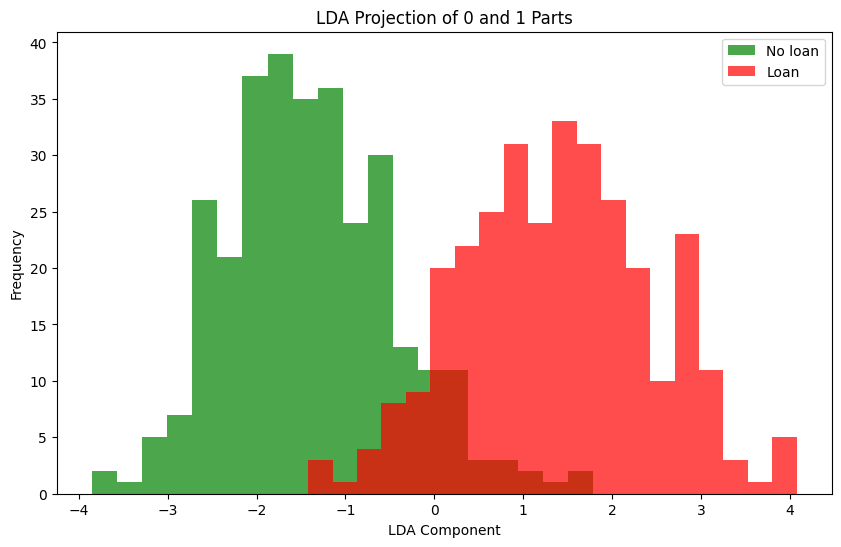

Feature Contributions to LDA Component:
               Feature  LDA Coefficient
2               Income             3.34
9           CD Account             1.29
6            Education             1.13
5                CCAvg             0.85
4               Family             0.81
1           Experience             0.52
3             ZIP Code             0.22
7             Mortgage            -0.09
8   Securities Account            -0.22
0                  Age            -0.38
10              Online            -0.55
11          CreditCard            -0.62


In [34]:
# Plot the LDA projection
plt.figure(figsize=(10, 6))
plt.hist(X_lda[y_train == 0], bins=20, alpha=0.7, label='No loan', color='green')
plt.hist(X_lda[y_train == 1], bins=20, alpha=0.7, label='Loan', color='red')
plt.title("LDA Projection of 0 and 1 Parts")
plt.xlabel("LDA Component")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Examine feature contributions to the LDA component
feature_importance = pd.DataFrame({'Feature': X.columns, 'LDA Coefficient': lda_components[0].round(2)})
feature_importance = feature_importance.sort_values(by='LDA Coefficient', ascending=False)

# Display feature importance
print("Feature Contributions to LDA Component:")
print(feature_importance)

The above LDA coefficients table represent the eigenvectors. The largest value is from Income with coefficient of 3.34. This means that Income has the strongest influence on part of pushes the model towards predicting 1 (loan accepted). In other words, customers with higher income levels are much more likely to get a loan approval because of stronger financial position.<br> Conversely, Age feature pushes the model towards predicting 0 (loan not accepted). This suggest that older customers are less likely to be approved for new loans possibly due to lower demand for borrowing or due to risk averse.

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# copy the initial data
X_copy = df.drop('Personal Loan', axis=1)
y_copy = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(
    X_copy, y_copy, test_size=0.2, random_state=42, stratify=y_copy)

# create instance
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [57]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)

# predict the accuracy
accuracy_score(y_test,y_pred)

0.9182590233545648

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000


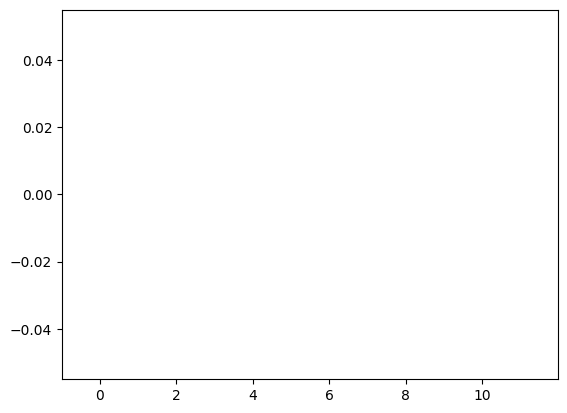

In [58]:
importance = classifier.feature_importances_

# Summarize feature importance
for i, v in enumerate(importance):
    print(f'Feature: {i}, Score: {v:.5f}')
plt.bar([x for x in range(len(importance))], importance)
plt.show()

[Text(0.5949074074074074, 0.9642857142857143, 'x[2] <= 113.5\ngini = 0.151\nsamples = 3766\nvalue = [3456, 310]'),
 Text(0.2824074074074074, 0.8928571428571429, 'x[5] <= 35.4\ngini = 0.038\nsamples = 3123\nvalue = [3063.0, 60.0]'),
 Text(0.43865740740740744, 0.9285714285714286, 'True  '),
 Text(0.09259259259259259, 0.8214285714285714, 'x[2] <= 106.5\ngini = 0.007\nsamples = 2910\nvalue = [2900, 10]'),
 Text(0.07407407407407407, 0.75, 'gini = 0.0\nsamples = 2846\nvalue = [2846, 0]'),
 Text(0.1111111111111111, 0.75, 'x[7] <= 240.0\ngini = 0.264\nsamples = 64\nvalue = [54, 10]'),
 Text(0.09259259259259259, 0.6785714285714286, 'x[4] <= 3.5\ngini = 0.245\nsamples = 63\nvalue = [54, 9]'),
 Text(0.037037037037037035, 0.6071428571428571, 'x[6] <= 1.5\ngini = 0.162\nsamples = 45\nvalue = [41, 4]'),
 Text(0.018518518518518517, 0.5357142857142857, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.05555555555555555, 0.5357142857142857, 'x[3] <= 90998.5\ngini = 0.32\nsamples = 20\nvalue = [16, 

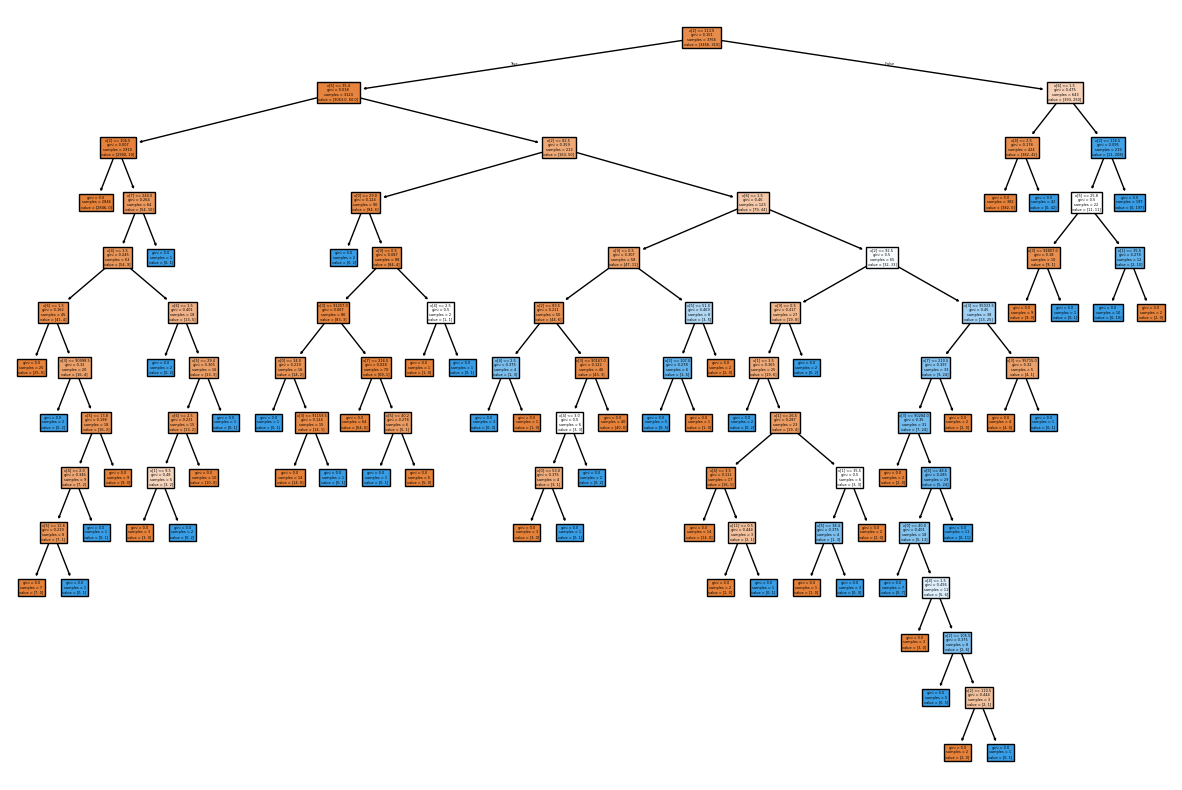

In [38]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled = True)

- In order to prevent overfiting we can use post proning and pre proning. This pruning technique is parameterized by the cost complexity prameter, ***ccp_alpha***. Greater values of ***ccp_alpha***, increase the number of nodes pruned. 

In [39]:
path = classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [40]:
impurities

array([0.        , 0.00049983, 0.00102331, 0.00128884, 0.00252754,
       0.00347166, 0.00382571, 0.00422401, 0.00502061, 0.00581721,
       0.00624206, 0.00753654, 0.0079791 , 0.00842165, 0.01066394,
       0.01112234, 0.01252326, 0.01300122, 0.01355441, 0.01478929,
       0.01606785, 0.01670894, 0.01740164, 0.01821318, 0.0190983 ,
       0.02001473, 0.02094877, 0.02189504, 0.0229911 , 0.0245489 ,
       0.02619533, 0.02853348, 0.03116093, 0.03680019, 0.05689558,
       0.15107924])

In [41]:
ccp_alphas

array([0.        , 0.00024991, 0.00026174, 0.00026553, 0.00030967,
       0.00031471, 0.00035404, 0.0003983 , 0.0003983 , 0.0003983 ,
       0.00042485, 0.00043149, 0.00044256, 0.00044256, 0.00044846,
       0.0004584 , 0.00046697, 0.00047796, 0.0005532 , 0.00061744,
       0.00063928, 0.00064109, 0.0006927 , 0.00081154, 0.00088511,
       0.00091644, 0.00093404, 0.00094627, 0.00109607, 0.0015578 ,
       0.00164642, 0.00233816, 0.00262745, 0.00563925, 0.02009539,
       0.04709183])

In [43]:
clfs = []
# iterate on each an every ccalpha
for ccp_alpha in ccp_alphas:
    classifier = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    classifier.fit(X_train,y_train)
    clfs.append(classifier)
print("Number of nodes in the last tree is : {} with ccp_alpha: {}".format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]
))

Number of nodes in the last tree is : 1 with ccp_alpha: 0.04709183105861674


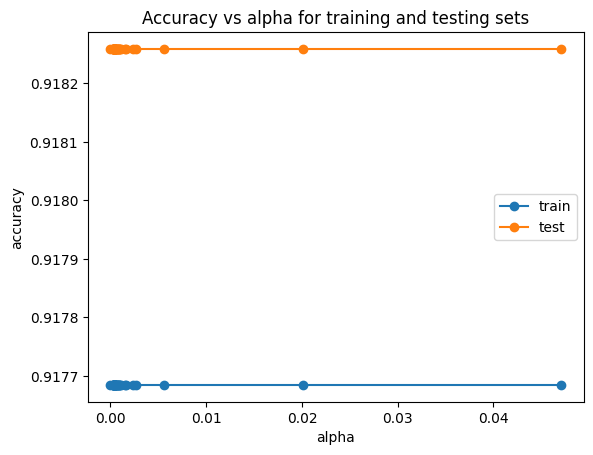

In [44]:
# For each and every classifier we will find the score
train_scores = [classifier.score(X_train, y_train) for clf in clfs]
test_scores = [classifier.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

So the tree is already optimal and cost complexity pruning does not improve the model. To be more specific we can see that neither train nor testing data are changing when alpha increases. 

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': np.arange(1, 10),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': [None, 'sqrt', 'log2'],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt_opt = GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    cv=cv,
    n_jobs=-1,        
    verbose=1,
    error_score='raise' 
)

dt_opt.fit(X_train, y_train)
print("Best parameters:", dt_opt.best_params_)
print("Best score:", dt_opt.best_score_)


Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
Best parameters: {'criterion': 'entropy', 'max_depth': np.int64(3), 'max_features': None, 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(2)}
Best score: 0.9596418922013097


In [63]:
best_tree = dt_opt.best_estimator_

In [65]:
importances = best_tree.feature_importances_
features = X_train.columns
# Create a dataframe to visualize (table) these values 
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importances' : importances
}).sort_values(by = 'Importances', ascending=False)

print(feature_importances_df)

               Feature  Importances
2               Income     0.753888
6            Education     0.246112
1           Experience     0.000000
0                  Age     0.000000
3             ZIP Code     0.000000
4               Family     0.000000
5                CCAvg     0.000000
7             Mortgage     0.000000
8   Securities Account     0.000000
9           CD Account     0.000000
10              Online     0.000000
11          CreditCard     0.000000


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# copy the initial data
X_copy = df.drop('Personal Loan', axis=1)
y_copy = df['Personal Loan']

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': np.arange(5, 12),
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3]
}
# train test split 
X_train, X_test, y_train, y_test = train_test_split(
    X_copy, y_copy, test_size=0.2, random_state=42, stratify=y_copy)

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # create 100 tree
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Accuracy: 98.73%


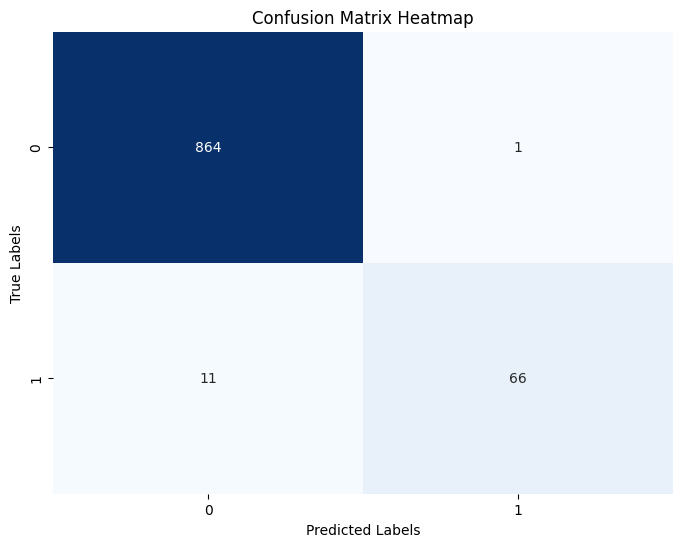

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Let s plot a confusion matrix for random forest classifier
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

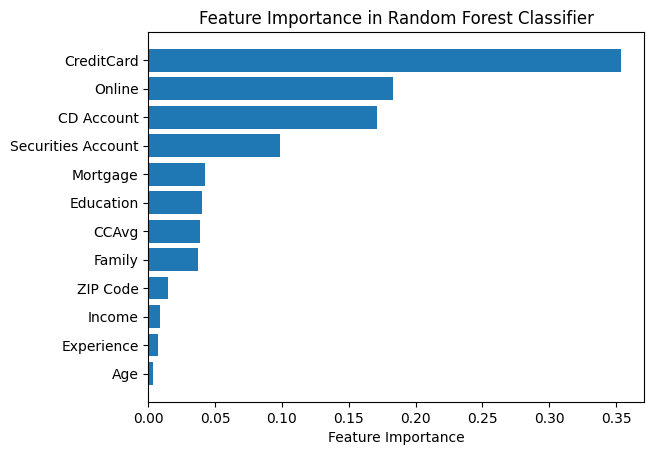

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       865
           1       0.99      0.86      0.92        77

    accuracy                           0.99       942
   macro avg       0.99      0.93      0.95       942
weighted avg       0.99      0.99      0.99       942



In [81]:
# Plot feature importance in Random forest classifier
feature_importances = classifier.feature_importances_
sorting = feature_importances.sort()
plt.barh(X_copy.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()
print(classification_report(y_test, y_pred))